Author: Daniel Abadjiev  
&nbsp;&nbsp;&nbsp; with lots of help from Eliza  
Date: June 3, 2025  
Description: a notebook to test some stuff with smartpixels data and get a handle on the data format/machine learning general things.   

Will partially follow Eliza's github, will also follow this tutorial https://www.tensorflow.org/tutorials/keras/classification

In [2]:
from OptimizedDataGenerator4 import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from utils import truncate



noGPU=False
if noGPU:
    tf.config.set_visible_devices([], 'GPU')

print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())
print(tf.test.is_gpu_available())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
False
False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [4]:
#// plotting code from google ai https://www.google.com/search?client=firefox-b-1-d&q=plot+tensorflow+model+history
# then modified
def plotModelHistory(history,modelNum = -999):
    plt.subplot(211)
    # Plot training & validation loss values
    plt.plot(history.history['loss'],label="Train")
    plt.plot(history.history['val_loss'],label="Validation")
    plt.title(f'Model {modelNum} loss and accuracy')
    plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    plt.legend()
    plt.subplot(212)
    # Plot training & validation accuracy values
    plt.plot(history.history['binary_accuracy'],label="Train")
    plt.plot(history.history['val_binary_accuracy'],label="Validation")
    # plt.title(f'Model {modelNum} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()


In [2]:
# data_dir = "../smartpixML/MuonColliderSim/Simulation_Output/";
# tf_dir = "./tfRecDirDaniel"
# labels_dir = "./labelsDirDaniel" #leftover 
# dataFormatter = OptimizedDataGenerator(
#     tf_records_dir=tf_dir,
#     # data_directory_path=data_dir,
#     # file_type="parquet",
#     load_records=True,  ## False, ## True if for tensorflow files no conversions
#     muon_collider=True,
#     x_feature_description=['cluster','x_profile','x_size'],
#     batch_size=3000,
#     filteringBIB=True
#     )
# dataFormatter.tfrecord_filenames.size

In [3]:
# print(dataFormatter)
# # print(dataFormatter.x_features)
# print(dataFormatter.x_feature_description)
# # dataFormatter.x_features['x_profile']
# print(dataFormatter.x_features['x_size'])
# print(np.shape(dataFormatter.x_features['x_size']))
# print(dataFormatter.labels)
# # plt.plot(dataFormatter.labels)
# model.fit(x=dataFormatter.x_features['x_size'],y=dataFormatter.labels)

In [5]:
validation_dir = "./tf_records1000Daniel/tfrecords_validation/"
train_dir = "./tf_records1000Daniel/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster', 'y_size', 'x_size', 'y_local']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)
nBatches=len([f for f in os.listdir(train_dir) if ".tfrecord" in f])
print(nBatches)
# trainODG._parse_tfrecord_fn()
## where do we tell it to use the z-global

60


In [6]:
## here i will be making a 4-layer neural network 
## Model 1: z-global, x size, y size, y local


## define the inputs
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(1,), name="y_size")
input4 = tf.keras.layers.Input(shape=(1,), name="y_local")

## concatenate the inputs into one layer
inputList = [input1, input2, input3, input4]
inputs = tf.keras.layers.Concatenate()(inputList)


## here i will add the layers 

stack1 = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack2 = tf.keras.layers.Dense(10, activation='relu')(stack1)
stack3 = tf.keras.layers.Dense(10, activation='relu')(stack2)
stack4 = tf.keras.layers.Dense(10, activation='relu')(stack3)
stack5 = tf.keras.layers.Dense(10, activation='relu')(stack4)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack5)

main_model = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

main_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = []

history3 = main_model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)
print(main_model.evaluate(validationODG, verbose=0))

all_weights = main_model.get_weights()
for i, w in enumerate(all_weights):
    print(f"array #{i}: shape = {w.shape}")
    print(w, "\n")




Epoch 1/100


2025-07-24 22:29:48.661799: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - binary_accuracy: 0.5091 - loss: 0.6932 - val_binary_accuracy: 0.6045 - val_loss: 0.6926
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - binary_accuracy: 0.5582 - loss: 0.6925 - val_binary_accuracy: 0.6083 - val_loss: 0.6898
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.5928 - loss: 0.6899 - val_binary_accuracy: 0.6392 - val_loss: 0.6842
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.6221 - loss: 0.6844 - val_binary_accuracy: 0.6523 - val_loss: 0.6773
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.6512 - loss: 0.6720 - val_binary_accuracy: 0.6490 - val_loss: 0.6670
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - binary_accuracy: 0.6364 - loss: 0.6683 - val_binary_accuracy: 0.6534 - val_loss: 0.6562
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.6392 - loss: 0.6627 - val_binary_accuracy: 0.6575 - val_loss: 0.6486
Epoch 8/100
60/60 

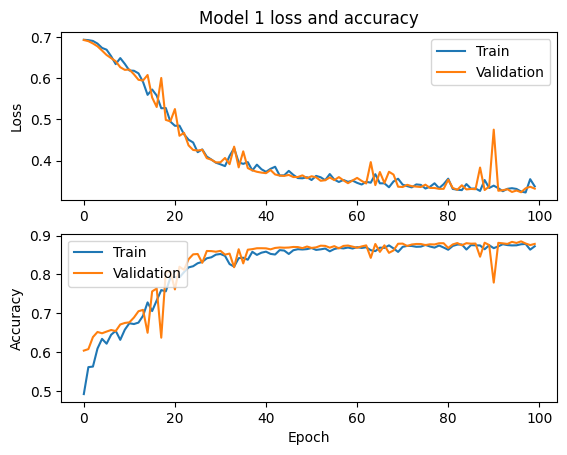

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_local             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4)         │          0 │ z_global[0][0],   │
│ (Concatenate)       │                   │            │ x_size[0][0],     │
│                     │                   │            │ y_size[0][0],     │
│                     │                   │            │ y_local[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │         50 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │        110 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │        110 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │        110 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10)        │        110 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         11 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

[array([[ 5.1544809e-01,  3.8198072e-01, -2.9251206e-04,  8.9272402e-02,
        -2.7919453e-01,  9.2120446e-02, -3.2656130e-01, -5.1390606e-01,
         5.3672004e-01,  5.3616995e-01],
       [-7.2802669e-01, -7.7534729e-01,  5.4108375e-01, -9.6288770e-01,
         8.0017066e-01,  4.0351772e-01,  2.7785441e-02,  4.4606015e-01,
        -1.3481069e-02,  1.1305026e+00],
       [-3.0213219e-01,  4.2864084e-01, -3.6319196e-01, -3.2001281e-01,
         7.7943659e-01, -3.3915687e-01, -2.4219690e-01,  6.6081715e-01,
         4.1784915e-01, -4.8884228e-01],
       [ 2.5534583e-02, -1.0408011e-02, -2.3325218e-01, -1.3548375e-02,
         1.2684338e-02, -3.8716912e-01, -8.1712008e-02, -4.0275228e-01,
        -1.1799860e-01, -1.5862869e-02]], dtype=float32), array([-0.01840319,  0.02854146,  0.09948383,  0.15868075, -0.09010361,
       -0.14722377,  0.2595741 ,  0.02522967,  0.00516705, -0.04411592],
      dtype=float32), array([[ 2.2651973e-01, -7.1914089e-01,  3.0990601e-02, -2.3825094e-01,
   

In [8]:
plotModelHistory(history3, 1)
main_model.summary()
print(main_model.get_weights())
loss, acc = main_model.evaluate(validationODG, verbose=0)
print(f"loss = {loss:.4f}, accuracy = {acc:.4f}")

In [29]:
weights = main_model.get_weights()
print(main_model.get_weights())
"""
quantized_model = main_model

# Truncate every kernel (even indices) to 3 decimal places
for i in range(0, len(weights), 2):
    weights[i] = np.trunc(weights[i] * 1000) / 1000.0

# Now update the model all at once
quantized_model.set_weights(weights)

test_loss, test_acc = quantized_model.evaluate(validationODG)
print("test accuracy: "+str(test_acc))
print(quantized_model.get_weights())

"""

import numpy as np

# 1) grab the un‐quantized weights once
original_weights = main_model.get_weights()

# we'll reuse the same model object for speed:
quantized_model = main_model

# 2) loop over desired decimal places
for decimals in [3, 2, 1]:
    factor = 10 ** decimals

    # make a fresh copy of the weights list
    w_copy = []
    for idx, w in enumerate(original_weights):
        if idx % 2 == 0:
            # truncate this kernel array
            w_trunc = np.trunc(w * factor) / factor
            w_copy.append(w_trunc)
        else:
            # leave biases (odd indices) untouched
            w_copy.append(w.copy())

    # apply & evaluate
    quantized_model.set_weights(w_copy)
    loss, acc = quantized_model.evaluate(validationODG, verbose=0)
    print(f"→ Truncated to {decimals} decimal place{'s' if decimals>1 else ''}: "
          f"loss = {loss:.4f}, accuracy = {acc:.4f}")


    
    

[array([[ 0.02512031,  0.08243986, -0.18169191,  0.43577427,  0.4923433 ,
        -0.73214316, -0.5832881 ,  0.31175613, -0.01655233,  0.6603881 ],
       [ 0.7765399 , -0.09031238,  0.5227153 , -1.3400024 , -0.00420721,
        -0.62199944, -0.50253665, -0.66999084,  1.3112943 , -0.6203064 ],
       [-0.2643692 , -0.44163606,  0.7771611 , -0.4745661 ,  0.6037849 ,
         0.16720997, -0.13583374,  0.65517485, -0.39512008,  0.00523561],
       [-0.07716484,  0.18387456, -0.04089529, -0.03583747,  0.27183422,
         0.3499111 , -0.40593073,  0.02044344,  0.04603549, -0.04137102]],
      dtype=float32), array([ 0.06843104,  0.10857209,  0.0121069 ,  0.2385925 , -0.06727181,
       -0.05387207, -0.0249032 , -0.0171746 , -0.06108043, -0.00869201],
      dtype=float32), array([[ 0.31986722,  0.3754836 , -0.64971083, -0.17878681, -0.12435026,
        -0.5073985 ,  0.79202473,  0.21231246, -0.44106546, -0.6299403 ],
       [-0.20173088, -0.40876767,  0.3838646 ,  0.26888222,  0.25040415,
 

In [30]:
print(main_model.get_weights())

[array([[ 0. ,  0. , -0.1,  0.4,  0.4, -0.7, -0.5,  0.3, -0. ,  0.6],
       [ 0.7, -0. ,  0.5, -1.3, -0. , -0.6, -0.5, -0.6,  1.3, -0.6],
       [-0.2, -0.4,  0.7, -0.4,  0.6,  0.1, -0.1,  0.6, -0.3,  0. ],
       [-0. ,  0.1, -0. , -0. ,  0.2,  0.3, -0.4,  0. ,  0. , -0. ]],
      dtype=float32), array([ 0.06843104,  0.10857209,  0.0121069 ,  0.2385925 , -0.06727181,
       -0.05387207, -0.0249032 , -0.0171746 , -0.06108043, -0.00869201],
      dtype=float32), array([[ 0.3,  0.3, -0.6, -0.1, -0.1, -0.5,  0.7,  0.2, -0.4, -0.6],
       [-0.2, -0.4,  0.3,  0.2,  0.2, -0.2,  0.5, -0.3, -0.1, -0.1],
       [ 0.5,  0.7, -0.5, -0. ,  0.5, -0. ,  0.2,  0.5,  0.4,  0. ],
       [-0.4, -0.8,  0.1,  0.3, -0.3,  0.3, -0. , -0.2,  0.4,  0.2],
       [ 0.2,  0.2, -0. , -0.2,  0.5,  0.1, -0.2,  0.2, -0.1,  0.2],
       [ 0.2,  0.1,  0.3,  0.3,  0.4, -0. ,  0.2,  0.3,  0.6, -0. ],
       [ 0.4, -0.2,  0.6, -0.3, -0. , -0.1,  0.6, -0.3, -0.4, -0.3],
       [-0.1, -0.2,  0.2, -0.1,  0. ,  0.6, -0.1, 

In [31]:
from tensorflow.keras import Input, Model
from qkeras import QDense, QActivation

input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(1,), name="y_size")
input4 = tf.keras.layers.Input(shape=(1,), name="y_local")

## concatenate the inputs into one layer
inputList = [input1, input2, input3, input4]
inputs = tf.keras.layers.Concatenate()(inputList)

var = QDense(
        10,
        kernel_quantizer=quantized_bits(16, 8, alpha=1),
        bias_quantizer=quantized_bits(16, 8, alpha=1),

        ## adds sum of the weights to the loss function 
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
        ## adds sum of the activations squared to the loss function 
        activity_regularizer=tf.keras.regularizers.L2(0.0001),
    )(inputs)
var = QActivation("relu")(var)
var = QDense(
        10,
        kernel_quantizer=quantized_bits(16, 8, alpha=1),
        bias_quantizer=quantized_bits(16, 8, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
        activity_regularizer=tf.keras.regularizers.L2(0.0001),
    )(var)
var = QActivation("relu")(var)
var = QDense(
        10,
        kernel_quantizer=quantized_bits(16, 8, alpha=1),
        bias_quantizer=quantized_bits(16, 8, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
        activity_regularizer=tf.keras.regularizers.L2(0.0001),
    )(var)
var = QActivation("relu")(var)
var = QDense(
        1,
        kernel_quantizer=quantized_bits(16, 8, alpha=1),
        bias_quantizer=quantized_bits(16, 8, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
    )(var)

output = QActivation("sigmoid")(var)

quantized_main_model = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

quantized_main_model.compile(optimizer='adam', 
                            loss='binary_crossentropy', 
                            metrics=['binary_accuracy'],
                            run_eagerly=True
                            )

callbacks = []
history3 = quantized_main_model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=150)





Epoch 1/150
 5/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.1967 - loss: 1.5475  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['q_dense/bias', 'q_dense_1/bias', 'q_dense_2/bias', 'q_dense_3/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.4589 - loss: 1.5624 - val_binary_accuracy: 0.4445 - val_loss: 1.3348
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - binary_accuracy: 0.5157 - loss: 1.3007 - val_binary_accuracy: 0.4931 - val_loss: 1.1312
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - binary_accuracy: 0.4831 - loss: 1.0927 - val_binary_accuracy: 0.5343 - val_loss: 0.9981
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - binary_accuracy: 0.5102 - loss: 0.9790 - val_binary_accuracy: 0.5192 - val_loss: 0.9145
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.5151 - loss: 0.9024 - val_binary_accuracy: 0.5431 - val_loss: 0.8594
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.5624 - loss: 0.8509 - val_binary_accuracy: 0.5858 - val_loss: 0.8209
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.5665 - loss: 0.8156 - val_binary_accuracy: 0.5344 - val_loss: 0.7938
Epoch 8/150
60/60 

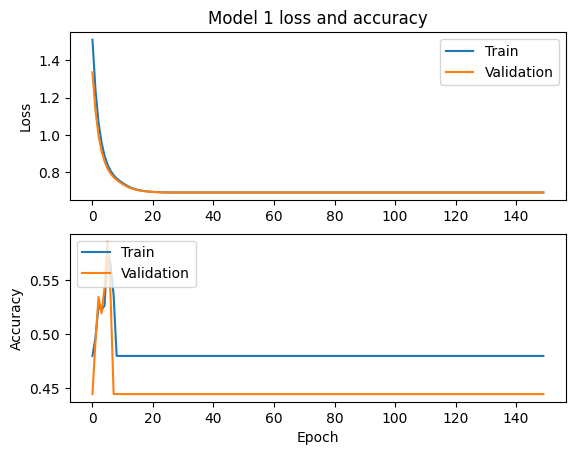

In [32]:
plotModelHistory(history3, 1)

In [33]:
quantized_main_model.summary()
all_weights = quantized_main_model.get_weights()
print(all_weights)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_local             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 4)         │          0 │ z_global[0][0],   │
│ (Concatenate)       │                   │            │ x_size[0][0],     │
│                     │                   │            │ y_size[0][0],     │
│                     │                   │            │ y_local[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_dense (QDense)    │ (None, 10)        │         50 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_activation        │ (None, 10)        │          0 │ q_dense[0][0]     │
│ (QActivation)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_dense_1 (QDense)  │ (None, 10)        │        110 │ q_activation[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_activation_1      │ (None, 10)        │          0 │ q_dense_1[0][0]   │
│ (QActivation)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_dense_2 (QDense)  │ (None, 10)        │        110 │ q_activation_1[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_activation_2      │ (None, 10)        │          0 │ q_dense_2[0][0]   │
│ (QActivation)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_dense_3 (QDense)  │ (None, 1)         │         11 │ q_activation_2[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q_activation_3      │ (None, 1)         │          0 │ q_dense_3[0][0]   │
│ (QActivation)       │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

[array([[ 1.62118973e-04,  1.89048806e-04,  3.67533648e-05,
         1.24681101e-05, -3.24020839e-05,  3.73154908e-05,
        -7.42858028e-05,  1.73703287e-04,  7.61575720e-05,
         3.88866101e-05],
       [ 4.66883735e-04, -3.83669481e-04,  9.44573549e-05,
         2.13184670e-04, -2.88822368e-04, -7.75462177e-05,
        -2.93943565e-04,  1.43461657e-04, -4.15271134e-05,
        -9.35292919e-05],
       [-3.80250167e-05,  8.43003509e-05, -3.16324411e-04,
         2.64268310e-05, -3.89870147e-05, -1.10355024e-04,
        -8.49401113e-06,  2.30151156e-04,  6.87775027e-05,
         5.30350517e-05],
       [ 1.66762300e-04, -8.19980414e-05,  4.87140816e-04,
        -1.34259375e-04,  4.22158773e-05, -1.75920111e-04,
        -1.11450299e-05, -2.90431199e-04,  4.61484655e-04,
         3.60762642e-05]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-1.84665478e-04, -8.47722185e-06, -1.51346263e-04,
         1.69449049e-04, -1.78481932e-04, -2.70

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
from qkeras import QDense, QActivation, quantized_bits

def make_model(int_bits):
    """
    Build & compile your QKeras model with the given number of integer bits.
    """
    tf.keras.backend.clear_session()
    # inputs
    input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
    input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
    input3 = tf.keras.layers.Input(shape=(1,), name="y_size")
    input4 = tf.keras.layers.Input(shape=(1,), name="y_local")
    x = tf.keras.layers.Concatenate()([input1, input2, input3, input4])
    
    # layer 1
    x = QDense(
        10,
        kernel_quantizer=quantized_bits(8, int_bits, alpha=1),
        bias_quantizer=quantized_bits(8, int_bits, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
        ## adds sum of the activations squared to the loss function 
        activity_regularizer=tf.keras.regularizers.L2(0.0001),
    )(x)
    x = QActivation("relu")(x)
    
    # layer 2 (example—you can tweak per‐layer bits)
    x = QDense(
        10,
        kernel_quantizer=quantized_bits(8, int_bits, alpha=1),
        bias_quantizer=quantized_bits(8, int_bits, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
        ## adds sum of the activations squared to the loss function 
        activity_regularizer=tf.keras.regularizers.L2(0.0001),
    )(x)
    x = QActivation("relu")(x)
    
    # layer 3
    x = QDense(
        10,
        kernel_quantizer=quantized_bits(8, int_bits, alpha=1),
        bias_quantizer=quantized_bits(8, int_bits, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.0001),
        ## adds sum of the activations squared to the loss function 
        activity_regularizer=tf.keras.regularizers.L2(0.0001),
    )(x)
    x = QActivation("relu")(x)
    
    # output
    x = QDense(
        1,
        kernel_quantizer=quantized_bits(8, int_bits, alpha=1),
        bias_quantizer=quantized_bits(8, int_bits, alpha=1),
        kernel_regularizer=tf.keras.regularizers.L2(0.0001),
    )(x)
    out = QActivation("sigmoid")(x)
    
    m = tf.keras.Model(inputs=[input1, input2, input3, input4], outputs=out)
    m.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["binary_accuracy"],
        run_eagerly=True
    )
    return m

# 1) define your sweep
bit_widths = [2, 4, 6]

# 2) containers for final metrics
train_losses, val_losses = {}, {}
train_accs,   val_accs   = {}, {}

for bits in bit_widths:
    print(f"\n→ training model with {bits} integer bits …")
    model = make_model(bits)
    hist  = model.fit(
        x=trainODG,
        validation_data=validationODG,
        epochs=100,        # you can shorten for quick experiments
        verbose=1
    )
    train_losses[f"{bits}"] = hist.history["loss"]
    val_losses[f"{bits}"] = hist.history["val_loss"]

    train_accs[f"{bits}"] = hist.history["binary_accuracy"]
    val_accs[f"{bits}"] = hist.history["val_binary_accuracy"]

plt.subplot(211)
plt.plot(train_losses["2"], label=f"train loss 2")
plt.plot(val_losses["2"], label=f"val loss 2")
plt.plot(train_losses["4"], label=f"train loss 4")
plt.plot(val_losses["4"], label=f"val loss 4")
plt.plot(train_losses["6"], label=f"train loss 6")
plt.plot(val_losses["6"], label=f"val loss 6")
plt.legend()
plt.show()




plt.subplot(212)
# … your plotting calls …
plt.plot(train_accs["2"], label=f"train acc 2")
plt.plot(val_accs["2"], label=f"val acc 2")
plt.plot(train_accs["4"], label=f"train acc 4")
plt.plot(val_accs["4"], label=f"val acc 4")
plt.plot(train_accs["6"], label=f"train acc 6")
plt.plot(val_accs["6"], label=f"val acc 6")

# place the legend to the right, outside the plot
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1),      # x=1.02 = just to the right of the axes, y=1 = top
    borderaxespad=0                # no padding between axes and legend
)
plt.tight_layout()    



plt.show()







→ training model with 2 integer bits …
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - binary_accuracy: 0.4262 - loss: 1.6747 - val_binary_accuracy: 0.5555 - val_loss: 1.2279
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.5691 - loss: 1.1767 - val_binary_accuracy: 0.5555 - val_loss: 1.0135
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.5226 - loss: 1.0062 - val_binary_accuracy: 0.5556 - val_loss: 0.8956
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - binary_accuracy: 0.5480 - loss: 0.8904 - val_binary_accuracy: 0.5570 - val_loss: 0.8332
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.6037 - loss: 0.8201 - val_binary_accuracy: 0.5592 - val_loss: 0.7996
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - binary_accuracy: 0.6009 - loss: 0.7908 - val_binary_accuracy: 0.5564 - val_loss: 0.7768
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - binary_accuracy: 0.6068 - loss: 0.7710 - val_binary_ac

: 

In [ ]:

print("Regularizer = 1: ___________________________________")
all_weights = model3.get_weights()
for i, w in enumerate(all_weights):
    print(f"array #{i}: shape = {w.shape}")
    print(w, "\n")
print("Regularizer = 0.1: ___________________________________")
all_weights = model4.get_weights()
for i, w in enumerate(all_weights):
    print(f"array #{i}: shape = {w.shape}")
    print(w, "\n")
print("Regularizer = 0.01: ___________________________________")
all_weights = model5.get_weights()
for i, w in enumerate(all_weights):
    print(f"array #{i}: shape = {w.shape}")
    print(w, "\n")
print("Regularizer = 0.001: ___________________________________")
all_weights = model6.get_weights()
for i, w in enumerate(all_weights):
    print(f"array #{i}: shape = {w.shape}")
    print(w, "\n")



Regularizer = 1: ___________________________________


NameError: name 'model3' is not defined

In [ ]:
def compare_model_weigths(model1, model2, length):
    model1_weights = model1.get_weights()
    model2_weights = model2.get_weights()
    for i in range(length - 1):
        ## input layer
        if i == 0:
            for j in range(len(model1_weights[i])):
                df = pd.DataFrame({'model1': model1_weights[i][j],
                                'model2': model2_weights[i][j],}, index=list(range(1,  1 + len(model1_weights[i][j]))))


                df.plot(kind='bar', rot=0)   # rot=0 keeps the index labels horizontal
                plt.xlabel('Node')
                plt.ylabel('Weight value')
                plt.title(f"Weights for input “{inputs[j]}”")
                plt.legend()
                plt.show()

        ## weight layer which will be even
        elif i % 2 == 0:
            for j in range(len(model1_weights[i])):
                df = pd.DataFrame({'model1': model1_weights[i][j],
                                'model2': model2_weights[i][j],}, index=list(range(1,  1 + len(model1_weights[i][j]))))


                df.plot(kind='bar', rot=0)   # rot=0 keeps the index labels horizontal
                plt.xlabel('Going to Node')
                plt.ylabel('Weight value')
                plt.title(f"Weights for node “{j}”")
                plt.legend()
                plt.show()

        ## bias layers
        elif i % 2 != 0:
            df = pd.DataFrame({'model1': model1_weights[i],
                            'model2': model2_weights[i],}, index=list(range(1,  1 + len(model1_weights[i]))))


            df.plot(kind='bar', rot=0)   # rot=0 keeps the index labels horizontal
            plt.xlabel('Node for bias')
            plt.ylabel('Weight value')
            plt.title(f"Bias for layer “{i}”")
            plt.legend()
            plt.show()
    
    ## now we will tackle the last layer
    output1 = []
    output2 = []
    output_layer1 = model1_weights[6]
    output_layer2 = model2_weights[6]

    for i in range(len(output_layer1)):
        output1.append(output_layer1[i][0])
        output2.append(output_layer2[i][0])
    
    df = pd.DataFrame({'model1': output1,
                            'model2': output2,}, index=list(range(1,  1 + len(output1))))


    df.plot(kind='bar', rot=0)   # rot=0 keeps the index labels horizontal
    plt.xlabel('Node for bias')
    plt.ylabel('Weight value')
    plt.title(f"Weights for each node to output")
    plt.legend()
    plt.show()

        

        
    

In [ ]:
model_weights = model3.get_weights()
print(len(model_weights[0]))
compare_model_weigths(main_model, model6, 7)

NameError: name 'model3' is not defined

In [ ]:
print(model4.get_weights()[6])

[[-5.4832512e-35]
 [-3.6432972e-35]
 [ 7.7750155e-36]
 [ 1.8617913e-33]
 [ 2.4007087e-35]
 [-3.1944604e-35]
 [-2.6060782e-35]
 [ 2.7526264e-35]
 [-1.5586428e-35]
 [ 3.9019884e-35]]


In [ ]:
saveModels = False
if saveModels:
    filepath = "./DanielModels/model1.keras"
    model.save(filepath)
    filepath = "./DanielModels/model2.keras"
    model2.save(filepath)
    filepath = "./DanielModels/model3.keras"
    model3.save(filepath)
    filepath = "./DanielModels/model4.keras"
    model4.save(filepath)
    filepath = "./DanielModels/model5.keras"
    model5.save(filepath)
    filepath = "./DanielModels/model6.keras"
    model6.save(filepath)